In [517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import os

In [518]:
#os.getcwd()

# Analysis

In [519]:
busn_no_spaces='real_estate'
re_df = pd.read_excel('{}_dict.xlsx'.format(busn_no_spaces))
re_df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
re_df.drop(["a"], axis=1, inplace=True)
re_df

,company,location,people
0,iQ Real Estate Sàrl,Veyrier,"['Studer Armin', ""parts de CHF 1'000"", 'UNIVER..."
1,IZA Real Estate SA,Vernier,['Ishuayed Sadek']
2,Masati Real Estate SA,Genève,['Paris Philippe Pierre']
3,"COPTIS ""Association suisse des professionnels ...",Lancy,"['Leuthold Manuel', 'Rossellat Michel', 'Klung..."
4,HOME REAL ESTATE Sàrl,Hermance,"['Cordelois Valérie', ""20 parts de CHF 1'000""]"
...,...,...,...
111,Daytona Real Estate Asset Management SA,Genève,['Pax Etienne André Norbert']
112,PP Real Estate SA,Chêne-Bourg,"['Pasquini Peruzzi Camillo Maria', 'Chêne-Bourg']"
113,PL REAL ESTATE SA,Genève,['Lasry Pierre']
114,Tala Real Estate SA,Genève,['Boissier Louis']


In [520]:
busn_no_spaces='immobilier'
immo_df = pd.read_excel('{}_dict.xlsx'.format(busn_no_spaces))
immo_df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
immo_df.drop(["a"], axis=1, inplace=True)
immo_df

,company,location,people
0,Société immobilière les Charmes - Russin SA,Russin,"['Kupferschmid Sarah', 'Vernier', 'Tissot Chri..."
1,Société Immobilière Rieu Parc K SA,Genève,"['Bertoldi Laurent', 'Carriero Pietro', 'Karas..."
2,Société Immobilière rue du Nant 25 SA,Genève,"['Schneider Théodore dit Ted', 'Evilard']"
3,Almax Immobilière SA,Genève,"['Germanier Jean Charles Marc', 'Conthey']"
4,Société Immobilière Route de Saint-Julien No 8 SA,Genève,"['Ferrillo Raphaël', 'Berthet Stéphane', 'Doud..."
...,...,...,...
1055,Société de Gestion immobilière et de Publicité SA,Genève,"['Schoettl Jean-Marc', 'MAR']"
1056,MACH Immobilier SA,Genève,['Gillieron Marc']
1057,Actua Immobilier SA,Carouge (GE),"['Gonet Vincent', 'Chappex Bill', 'Léger Fabri..."
1058,Société Immobilière Malagnou Bon Air SA,Genève,"['Roth Jean-Daniel', 'Bougeries', 'Niemetz Jér..."


In [521]:
re_df.sort_values('company').reset_index(drop=True)
#find and check problematic files
np.where(pd.isna(re_df['people'])==True)

(array([ 55, 115]),)

In [522]:
immo_df.sort_values('company').reset_index(drop=True)
#find and check problematic files
np.where(pd.isna(immo_df['people'])==True)

(array([ 69,  78, 111, 131, 156, 202, 212, 217, 226, 246, 331, 398, 425,
        480, 506, 509, 510, 580, 590, 633, 646, 723, 735, 833, 878, 882,
        910, 917, 928, 986, 991]),)

In [523]:
#exclude nan people rows
re_df_clean=re_df[re_df['people'].notna()].reset_index(drop=True)
immo_df_clean=immo_df[immo_df['people'].notna()].reset_index(drop=True)

In [525]:
print("total number of companies who have people info:",len(re_df_clean)+len(immo_df_clean))

total number of companies who have people info: 1143


In [526]:
#these are the common companies in df1 and df2
the_df1=np.where(re_df_clean['company'].isin(immo_df_clean['company'])==True)[0].tolist()
re_df_clean.iloc[the_df1]

the_df2=np.where(immo_df_clean['company'].isin(re_df_clean['company'])==True)[0].tolist()
immo_df_clean.iloc[the_df2]

,company,location,people
40,"COPTIS ""Association suisse des professionnels ...",Lancy,"['Leuthold Manuel', 'Rossellat Michel', 'Klung..."
571,COMPTOIR IMMOBILIER Real Estate Geneva SA,Genève,"['Epiney Paul', 'Moeschinger Philippe', 'Munoz..."
650,AXS Immobilier SA,Genève,['Martel Frédéric']
849,CERRUTI IMMOBILIER SA,Meyrin,['Cerruti John']


In [527]:
#keep unique company names -> no duplicates
re_df_clean=re_df_clean.drop(re_df_clean.index[the_df1]).reset_index()

In [528]:
if np.where(re_df_clean['company'].isin(immo_df_clean['company'])==True):
    print('no same company names in real_estate and immobilier, so we can join them')

no same company names in real_estate and immobilier, so we can join them


In [529]:
# join the dataframes real_estate and immobilier
df=re_df_clean.append(immo_df_clean)
print("total number of companies after removing duplicates:",len(df))

total number of companies after removing duplicates: 1139


/var/folders/7y/mqj_tfm964q8kcsr72k44zbm0000gn/T/ipykernel_84438/725189811.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=re_df_clean.append(immo_df_clean)


In [530]:
df=df.drop(['index'],axis=1).sort_values('company').reset_index(drop=True)
df

,company,location,people
0,8 Ball Group Immobilier SA,Lancy,['Bourn Daniel']
1,A & A Real Estate Grand-Pré SA,Genève,"['Kurer Thomas', 'Kobi Jonas', 'Kurer Frank', ..."
2,A B I Administration de Biens Immobiliers SA,Genève,"['Exposito Jose Ramon', 'AUDIT PRESTIGE SA (CH..."
3,A.P.I. Agence de Promotions Immobilières SARL,Genève,['Zuanon Sergio Giuseppe']
4,A.R.C Immobilier SA,Carouge (GE),"['Lansmant Patrice', 'Graf Albert']"
...,...,...,...
1134,iQ Real Estate Sàrl,Veyrier,"['Studer Armin', ""parts de CHF 1'000"", 'UNIVER..."
1135,m3 Immobilier Holding SA,Genève,"['Chatila Abdallah', 'Berney Associés Audit SA..."
1136,m3 REAL ESTATE SA,Genève,['Chatila Abdallah']
1137,neZen immobilier sàrl,Chêne-Bourg,"['Karoum Fikri', '168 parts de CHF 100', 'Medk..."


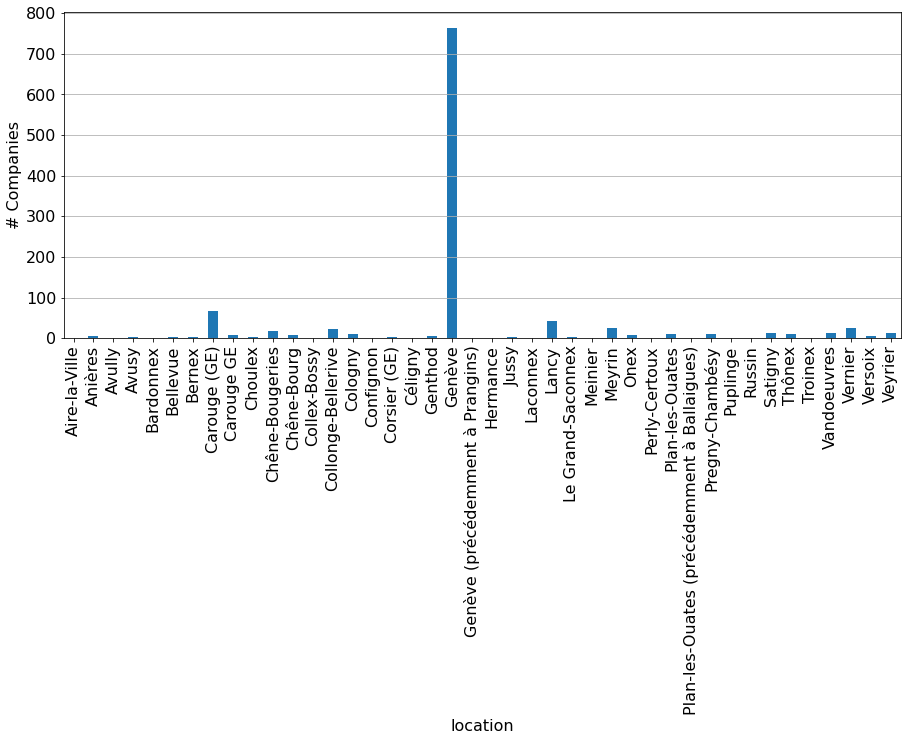

In [531]:
df.groupby(['location']).count()["company"].plot.bar(ylabel='# Companies', legend=None,figsize=(15,6)).grid(axis='y')

In [532]:
num_people=[]
for ll in range(len(df.people)):
    num_people.append(len(ast.literal_eval(df.people.iloc[ll])))   

In [533]:
df["# people"]=num_people
df

,company,location,people,# people
0,8 Ball Group Immobilier SA,Lancy,['Bourn Daniel'],1
1,A & A Real Estate Grand-Pré SA,Genève,"['Kurer Thomas', 'Kobi Jonas', 'Kurer Frank', ...",4
2,A B I Administration de Biens Immobiliers SA,Genève,"['Exposito Jose Ramon', 'AUDIT PRESTIGE SA (CH...",3
3,A.P.I. Agence de Promotions Immobilières SARL,Genève,['Zuanon Sergio Giuseppe'],1
4,A.R.C Immobilier SA,Carouge (GE),"['Lansmant Patrice', 'Graf Albert']",2
...,...,...,...,...
1134,iQ Real Estate Sàrl,Veyrier,"['Studer Armin', ""parts de CHF 1'000"", 'UNIVER...",6
1135,m3 Immobilier Holding SA,Genève,"['Chatila Abdallah', 'Berney Associés Audit SA...",7
1136,m3 REAL ESTATE SA,Genève,['Chatila Abdallah'],1
1137,neZen immobilier sàrl,Chêne-Bourg,"['Karoum Fikri', '168 parts de CHF 100', 'Medk...",4


In [534]:
df.describe().round().iloc[[0,1,3,-1]]

,# people
count,1139.0
mean,3.0
min,1.0
max,47.0


In [538]:
#df[df["# people"]==df["# people"].max()]#["people"].tolist()

In [537]:
#df[df["# people"]==15]

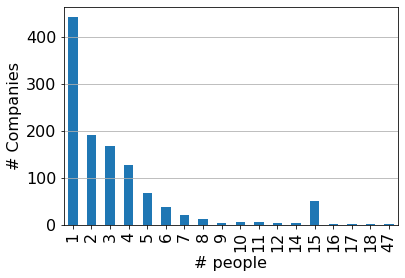

In [539]:
df.groupby(["# people"])["company"].count().plot.bar(ylabel='# Companies', legend=None).grid(axis='y')
plt.rcParams.update({'font.size': 16})

In [540]:
#get all names from all companies as a list
ppl=[]
for ll in range(0,len(df)):
    ppl.append(df['people'].apply(ast.literal_eval)[ll])
all_people = [item for sublist in ppl for item in sublist]
all_people

['Bourn Daniel',
 'Kurer Thomas',
 'Kobi Jonas',
 'Kurer Frank',
 'BDO AG (CH-020.3.927.906-5)',
 'Exposito Jose Ramon',
 'AUDIT PRESTIGE SA (CHE-112.230.932)',
 'Satigny',
 'Zuanon Sergio Giuseppe',
 'Lansmant Patrice',
 'Graf Albert',
 'Gilet épouse Bacuet Annabelle Carole France',
 'Ajdini Sabit',
 'Bueno Leal Manuel',
 'El Madhoun Nasr',
 'Bellerive',
 'Mendez Alvarez José Antonio',
 'Genève',
 'Caveng Audrey',
 'Said Adam',
 'Dominé Bertrand',
 'Gru Marco',
 'Scholliers Bart',
 'Bellerive',
 'Marzullo Eric',
 'Boujon Marine-Amélie Charlotte',
 'Hermance',
 'Cohen Léonard',
 'Gallo Alessandro',
 'Maggiori Nicolas',
 'Montanes Angel',
 'Chens-sur-Léman',
 'Rouvinet Serge',
 'Déry Anthony',
 "parts de CHF 1'000",
 'Peyrot Dorothée Michelle Catherine',
 'Neuchâtel',
 'Gallo Alexandre',
 'Bellerive',
 'Paley Philippe',
 'Ribordy Jean',
 'Rollier Patricia',
 'Derivry Annabelle',
 'Genevois',
 'Volpicelli Massimiliano',
 'Lancy',
 'Fanni Alberto',
 'Salerno Graziella',
 'Bougeries',
 'Sc

In [542]:
#print(len([x for x in all_people if (' ' in x )== False]))
#np.unique([x for x in all_people if (' ' in x )== False])

In [543]:
#print(len([x for x in all_people if ("CHF" in x )== True]))
#np.unique([x for x in all_people if ("CHF" in x )== True])

In [544]:
# filter strings that are not names, by assuming that people have a name and surname seprated by space
print('num of people before filtering:',len(all_people))
people_clean=[x for x in all_people if (' ' in x )== True and ("CHF" in x )== False and ("GE" in x )== False and ("Genève" in x )== False and ("à " in x )== False]
print('num of people after filtering: ',len(people_clean))
print('num of unique people: ',len(np.unique(people_clean)))
if len(people_clean)!=len(np.unique(people_clean)):
    print('some people appear in more than 1 companies -> interactions')

num of people before filtering: 3744
num of people after filtering:  2768
num of unique people:  1596
some people appear in more than 1 companies -> interactions


## find interactions

In [545]:
import collections
people_dupl=[item for item, count in collections.Counter(people_clean).items() if count > 1]

In [546]:
people_multi=[]
people_times=[]
companies_multi=[]
ccc=[]
for ll in range(len(people_dupl)):
        people_multi.append(people_dupl[ll])
        people_times.append(people_clean.count(people_dupl[ll]))
        try:
            companies_multi.append(df[df.people.str.contains(people_dupl[ll])].company)
        except:
            #print(ll)
            companies_multi.append(df[df.people.str.contains(people_dupl[ll].replace('(',""))].company)
        #print(people_dupl[ll],' appears ',people_clean.count(people_dupl[ll]), 'times')

/var/folders/7y/mqj_tfm964q8kcsr72k44zbm0000gn/T/ipykernel_84438/2007887913.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  companies_multi.append(df[df.people.str.contains(people_dupl[ll])].company)


In [549]:
#df[df.people.str.contains('Rivollet Pascal')]

In [548]:
#df[df.people.str.contains('Jelsch Xénia')]

In [550]:
interactions_df = pd.DataFrame()  
interactions_df['people']=people_multi
interactions_df['# companies']=people_times
interactions_df['companies']=companies_multi

In [551]:
interactions_df

,people,# companies,companies
0,Mendez Alvarez José Antonio,2,7 ABEL Immobilier Concept SA 201 Fir...
1,Scholliers Bart,2,10 ACIGe Association des Agences et Courti...
2,Marzullo Eric,2,10 ACIGe Association des Agences et Courti...
3,Maggiori Nicolas,2,10 ACIGe Association des Agences et Court...
4,Ribordy Jean,2,15 AGENCE IMMOBILIERE RIBORDY SA 649 ...
...,...,...,...
279,Cottier Philippe,3,930 Société Immobilière Thônex-Soleil A SA ...
280,Ador Thierry,2,992 Société Immobilière du Garage des Pâqu...
281,Nassisi Claudia,2,1001 Société Immobilière en Mazel SA 1004 ...
282,"""Nicolas Wenger",3,"1022 Société Immobilière la Radieuse A SA, ..."


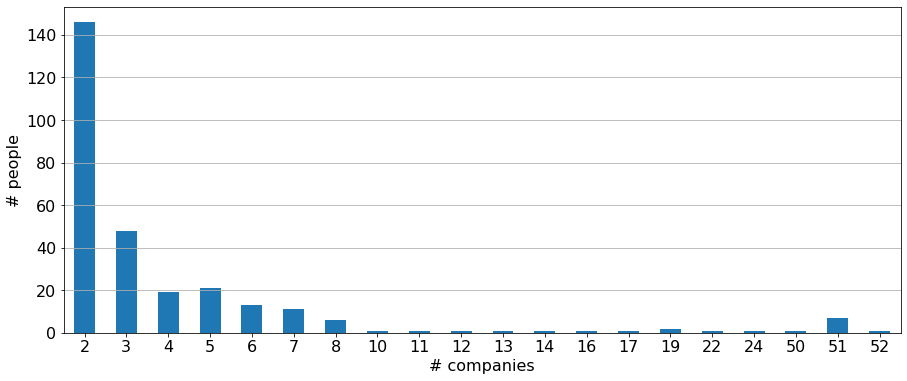

In [552]:
interactions_df.groupby("# companies")["people"].count().plot.bar(ylabel='# people',figsize=(15,6), rot=0).grid(axis='y')
#.plot.bar(figsize=(15,6))\
plt.rcParams.update({'font.size': 16})

In [553]:
if not [print( ll) for ll in people_clean if ll in df.company]:
    print('no company names are found in people list of other companies')
else:
    print('some company names are found in people session of other companies')

no company names are found in people list of other companies


In [554]:
#interactions_df[interactions_df["# companies"]==14]#["companies"].tolist()

In [557]:
interactions_df[interactions_df["# companies"]<15].describe().round().iloc[[0,1,3,-1]]

,# companies
count,269.0
mean,3.0
min,2.0
max,14.0
